In [2]:
import mysql.connector as mysql
import pandas as pd
import folium
import requests
import googlemaps
from geopy.distance import geodesic
import numpy as np
from tqdm import tqdm
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from matplotlib import font_manager
from matplotlib import rc

#database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com


In [27]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

# 업력에 따른 매출

In [28]:
cursor = remote.cursor(buffered=True)
cursor.execute("""
                SELECT 
    co.foundation AS 업력,
    ROUND(AVG(co.income)) AS 총매출
FROM 
    company_info co
WHERE 
    co.foundation IS NOT NULL
    AND co.income IS NOT NULL
    AND co.income > 0 
    AND co.foundation > 0

GROUP BY 
    co.foundation
ORDER BY 
    co.foundation;

""")

result = cursor.fetchall()

df = pd.DataFrame(result)

df

,0,1
0,1974,25000
1,1983,32
2,1987,978
3,1992,36
4,1995,158
5,1998,49
6,1999,238
7,2000,184
8,2001,37
9,2002,36


In [29]:
df.columns = ["설립일", "매출(억)"]

df

,설립일,매출(억)
0,1974,25000
1,1983,32
2,1987,978
3,1992,36
4,1995,158
5,1998,49
6,1999,238
7,2000,184
8,2001,37
9,2002,36


In [30]:
year_list = []
for idx, row in tqdm(df.iterrows(), total = len(df.index)):
    year = 2025 - row["설립일"]
    year_list.append(year)

df["업력"] = year_list
df

100%|██████████| 31/31 [00:00<00:00, 19065.02it/s]


,설립일,매출(억),업력
0,1974,25000,51
1,1983,32,42
2,1987,978,38
3,1992,36,33
4,1995,158,30
5,1998,49,27
6,1999,238,26
7,2000,184,25
8,2001,37,24
9,2002,36,23


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   설립일     31 non-null     int64 
 1   매출(억)   31 non-null     object
 2   업력      31 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 872.0+ bytes


In [33]:
df["매출(억)"] = df["매출(억)"].astype(int)

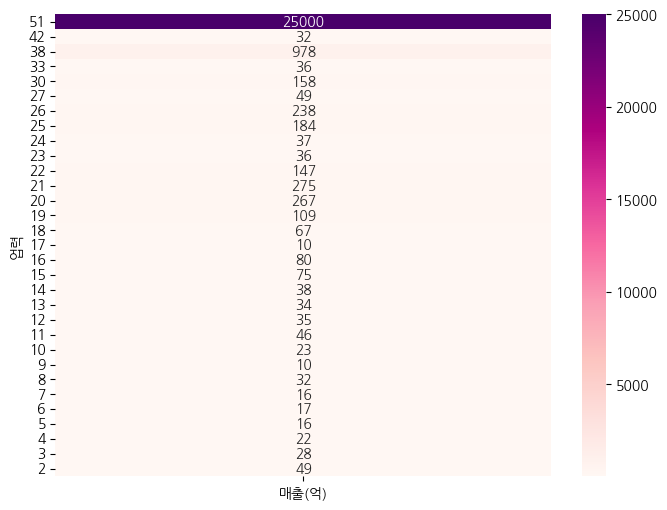

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from matplotlib import font_manager

# 한글 폰트 설정 (Linux: NanumGothic)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path)
rc('font', family=font.get_name())

# 히트맵용 데이터 준비
heatmap_data = df.pivot_table(index="업력", values="매출(억)", aggfunc="sum")
heatmap_data = heatmap_data.sort_index(ascending=False)

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="RdPu", cbar=True)

# x축, y축 라벨 제거 (선택)
# plt.xlabel("")
# plt.ylabel("")
# plt.xticks([])
# plt.yticks([])

# 히트맵 표시
plt.show()


# 경신 제거 후

In [39]:
df.drop(index=0, inplace= True)

df.reset_index(drop=True)

df

,설립일,매출(억),업력
1,1983,32,42
2,1987,978,38
3,1992,36,33
4,1995,158,30
5,1998,49,27
6,1999,238,26
7,2000,184,25
8,2001,37,24
9,2002,36,23
10,2003,147,22


In [41]:

df

,설립일,매출(억),업력
1,1983,32,42
2,1987,978,38
3,1992,36,33
4,1995,158,30
5,1998,49,27
6,1999,238,26
7,2000,184,25
8,2001,37,24
9,2002,36,23
10,2003,147,22


In [44]:
df.reset_index(drop=True, inplace=True)

In [45]:
df

,설립일,매출(억),업력
0,1983,32,42
1,1987,978,38
2,1992,36,33
3,1995,158,30
4,1998,49,27
5,1999,238,26
6,2000,184,25
7,2001,37,24
8,2002,36,23
9,2003,147,22


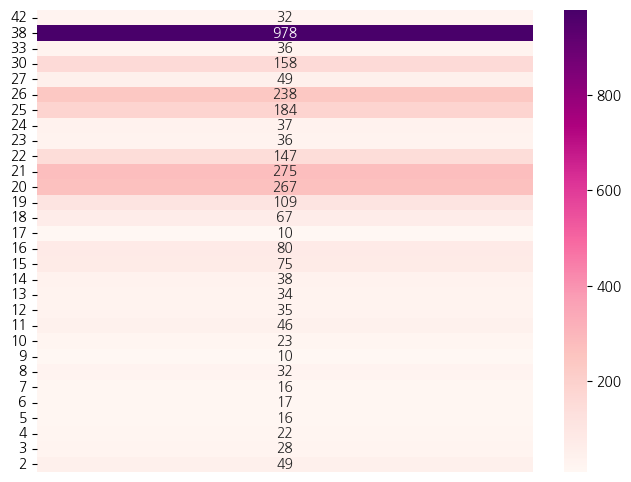

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from matplotlib import font_manager

# 한글 폰트 설정 (Linux: NanumGothic)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path)
rc('font', family=font.get_name())

# 히트맵용 데이터 준비
heatmap_data = df.pivot_table(index="업력", values="매출(억)", aggfunc="sum")
heatmap_data = heatmap_data.sort_index(ascending=False)

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="RdPu", cbar=True)

# x축, y축 라벨 제거 (선택)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
# plt.yticks([])

# 히트맵 표시
plt.show()


/tmp/ipykernel_15724/2684943848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="설립일", y="매출", data=df, palette="Set2")
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/home/usou/venv/eda_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/usou/venv/eda_venv/lib/python3.10/site-packages/IPython/cor

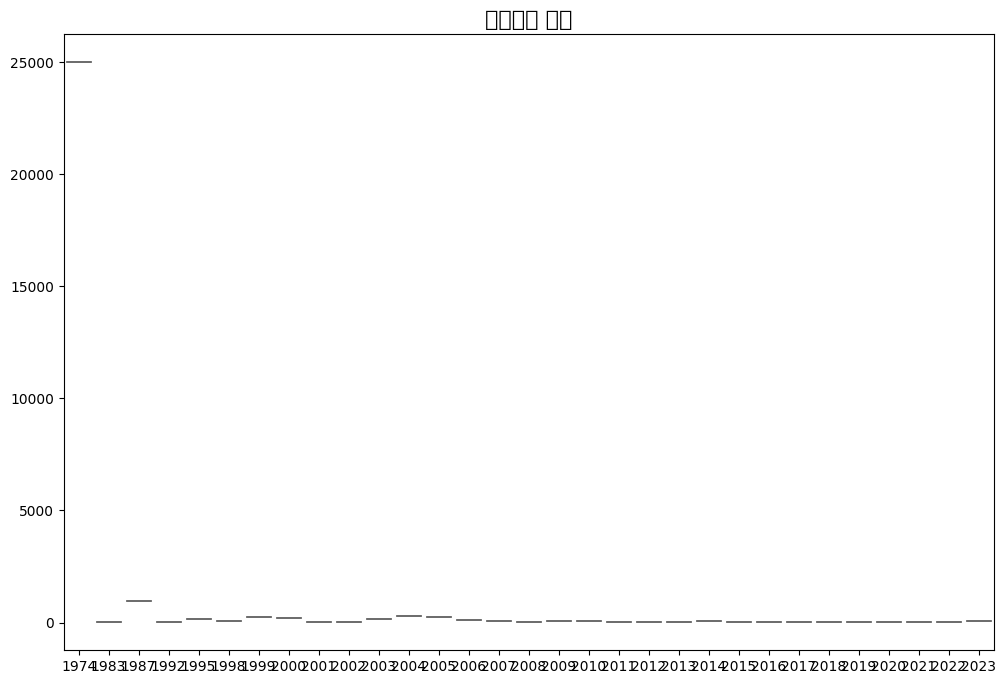

In [ ]:

plt.figure(figsize=(12, 8))
sns.violinplot(x="설립일", y="매출", data=df, palette="Set2")

# 제목 및 레이블 설정
plt.title("설립일별 매출", fontsize=16)
plt.xlabel("설립일", fontsize=12)
plt.ylabel("매출", fontsize=12)

# 그래프 표시
plt.show()

C:\Users\NDY\AppData\Local\Temp\ipykernel_23216\1548525175.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="설립일", y="매출", data=df, palette="Set2")


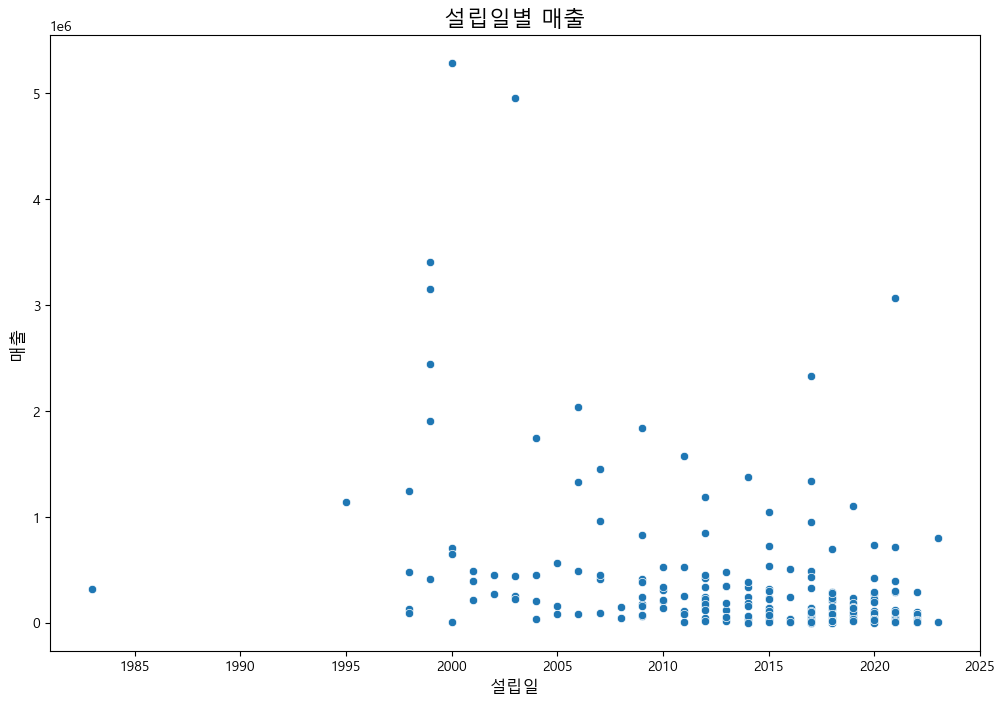

In [14]:
rc('font', family='Malgun Gothic')

plt.figure(figsize=(12, 8))
sns.scatterplot(x="설립일", y="매출", data=df, palette="Set2")

# 제목 및 레이블 설정
plt.title("설립일별 매출", fontsize=16)
plt.xlabel("설립일", fontsize=12)
plt.ylabel("매출", fontsize=12)

# 그래프 표시
plt.show()

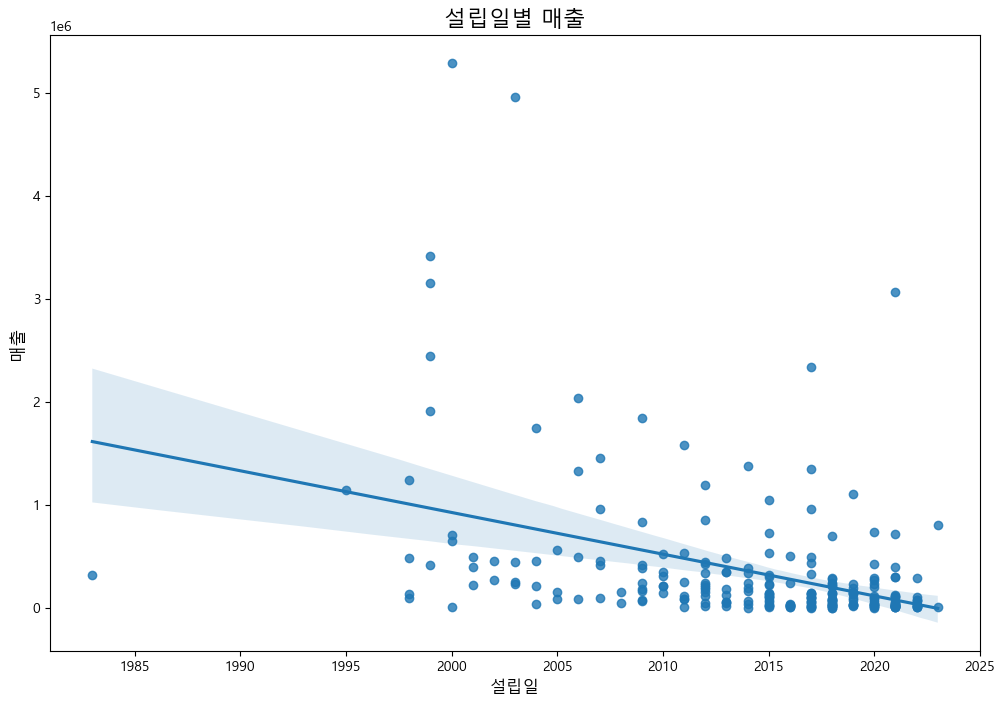

In [16]:
rc('font', family='Malgun Gothic')

plt.figure(figsize=(12, 8))
sns.regplot(x="설립일", y="매출", data=df)

# 제목 및 레이블 설정
plt.title("설립일별 매출", fontsize=16)
plt.xlabel("설립일", fontsize=12)
plt.ylabel("매출", fontsize=12)

# 그래프 표시
plt.show()

In [17]:
remote.close()